### Importing Required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Checking The shape of Data

In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
y = df.iloc[:,-1]

In [8]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# Separating Categorical and Numerical

In [9]:
df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [10]:
df_categorical

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [11]:
df_numerical

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


# Checking For Null Values

In [12]:
df_numerical.isnull().sum()

car_ID              0
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
null_values = []
for i in df_numerical.columns:
    if df_numerical[i].isnull().sum()>0:
        withnull.append[i]
        
print(null_values)

[]


In [14]:
null_values

[]

In [15]:
null_values = []
for i in df_categorical.columns:
    if df_categorical[i].isnull().sum()>0:
        with_null.append[i]
        
print(null_values)

[]


In [16]:
null_values

[]

In [17]:
df_categorical.isnull().sum()

CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64

# Variable Transfermation

In [18]:
import scipy.stats as stats

In [19]:
import feature_engine.transformation as vt  # variable transformation 

In [20]:
for i in df_numerical.columns:
    reg = vt.ReciprocalTransformer(variables=[i])

In [21]:
reg.fit(df_numerical)

ReciprocalTransformer(variables=['price'])

In [22]:
reg.fit_transform(df_numerical)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.000074
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.000061
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0.000061
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0.000072
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0.000059
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0.000053
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0.000047
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0.000045


In [23]:
data_1 = reg.transform(df_numerical)

In [24]:
def fun(df_numerical,features):
    plt.figure(figsize = (15,7))
    plt.subplot=(1,2,1)
    print(features)
    df_numerical[features].hist(bins=30)
    
    plt.subplot=(1,2,2)
    stats.probplot(df_numerical[features],dist = 'norm',plot = plt)
    plt.show()

car_ID


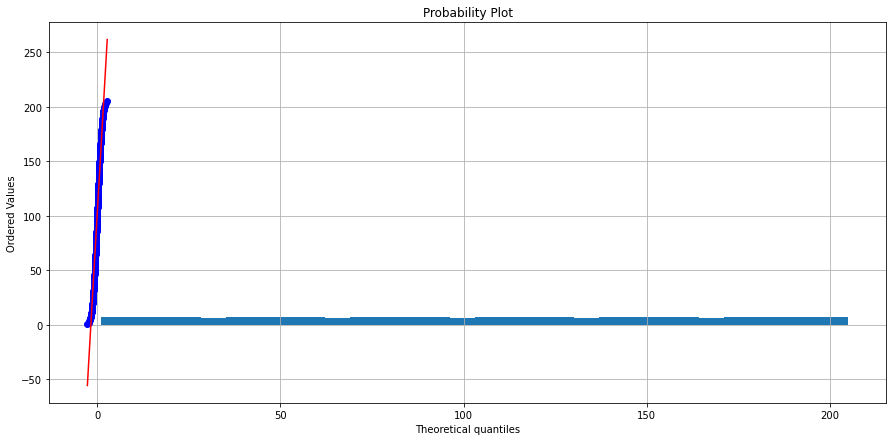

symboling


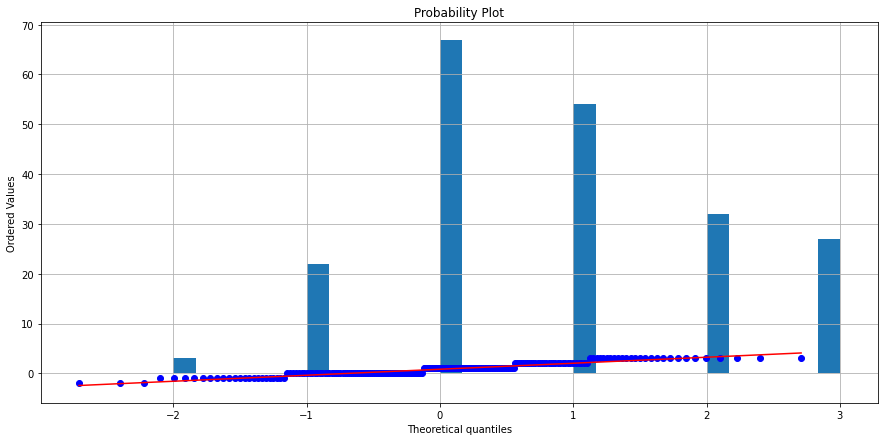

wheelbase


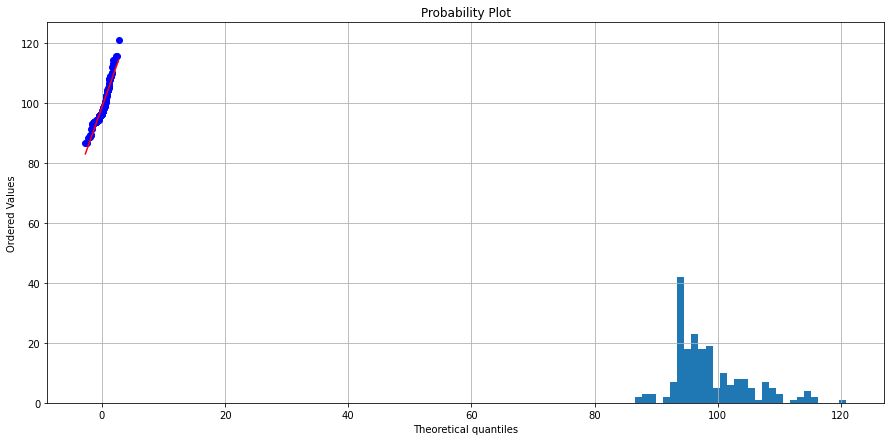

carlength


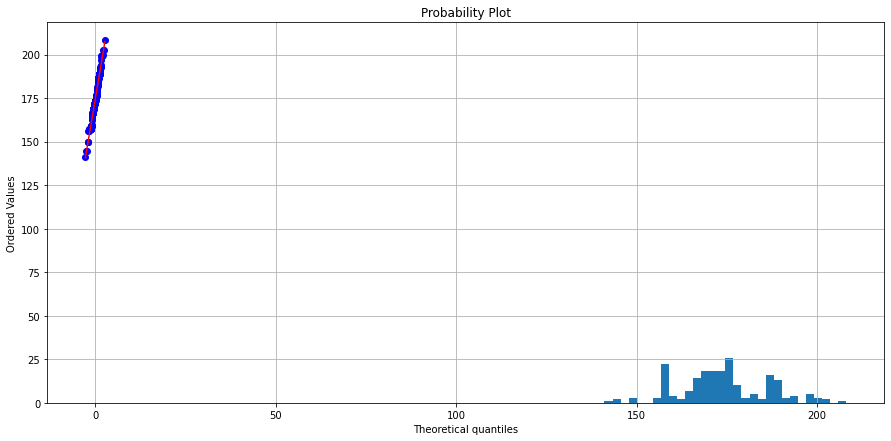

carwidth


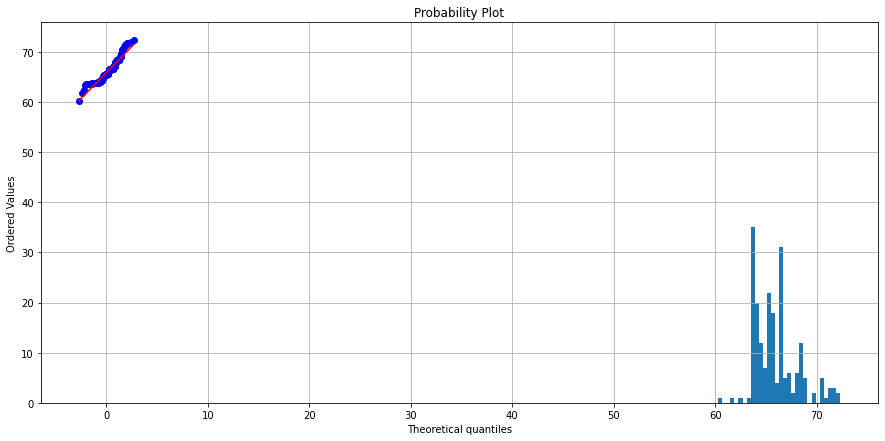

carheight


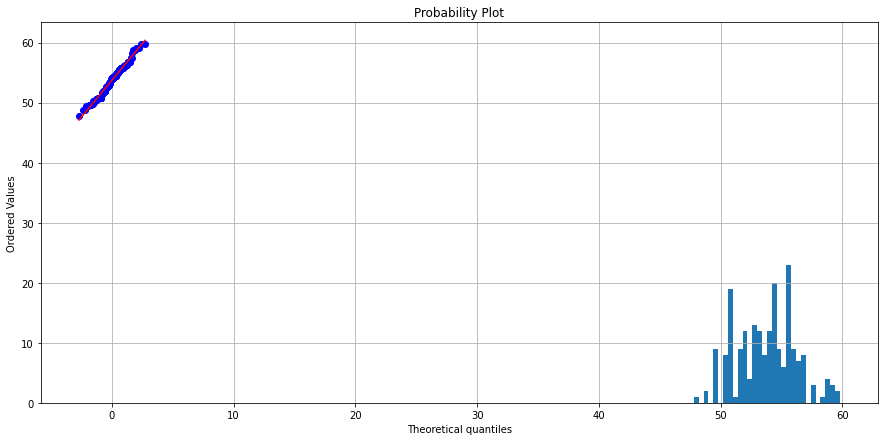

curbweight


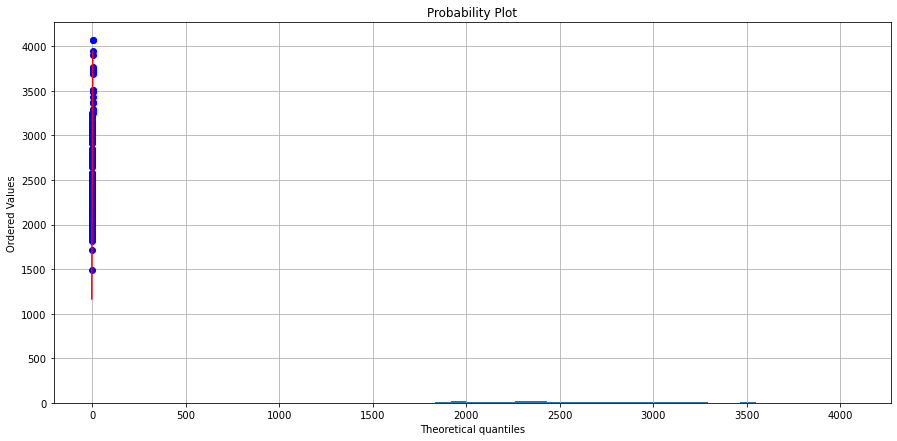

enginesize


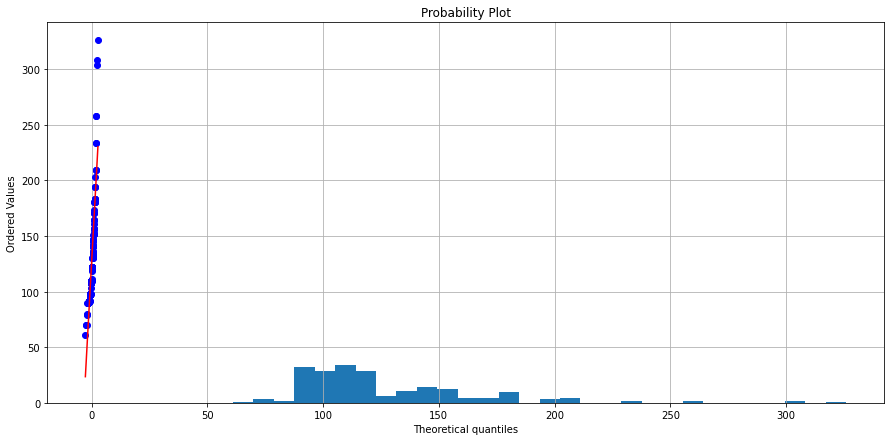

boreratio


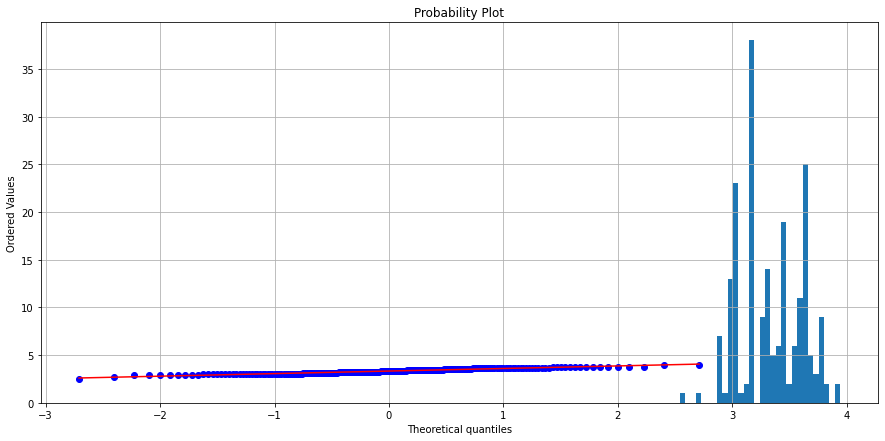

stroke


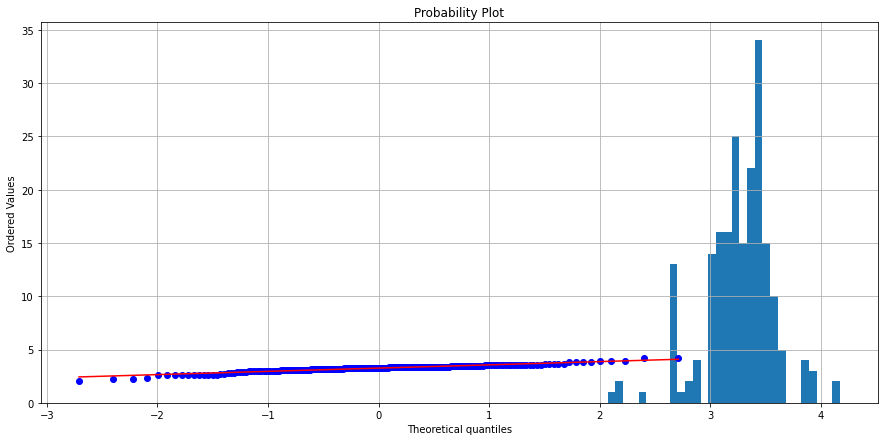

compressionratio


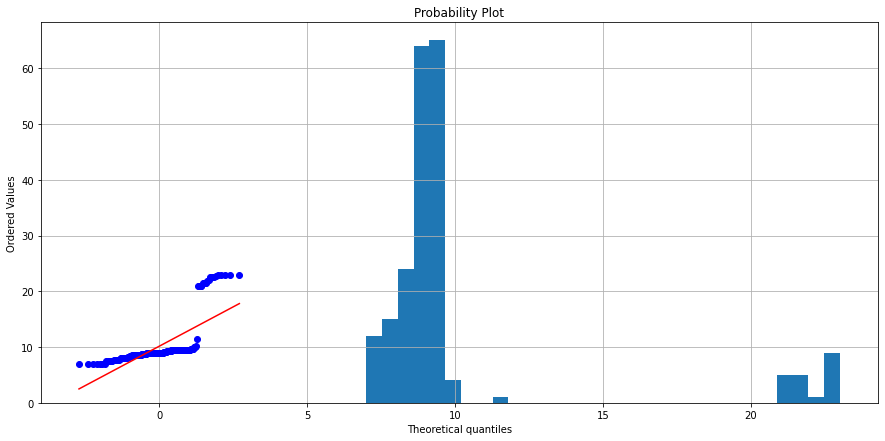

horsepower


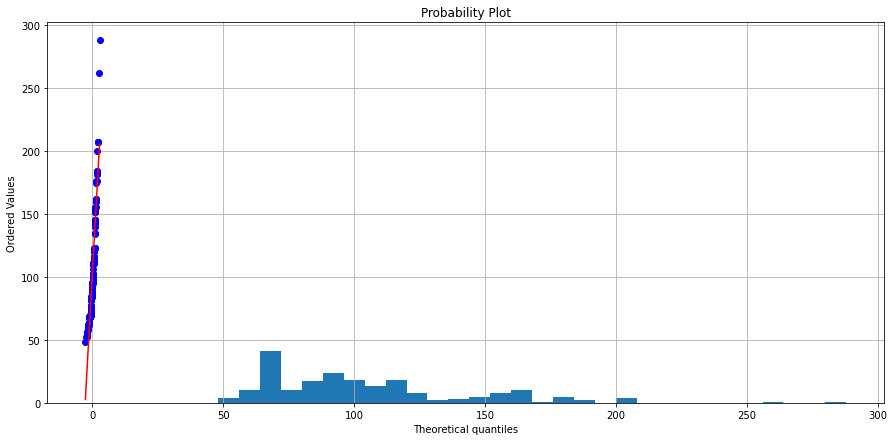

peakrpm


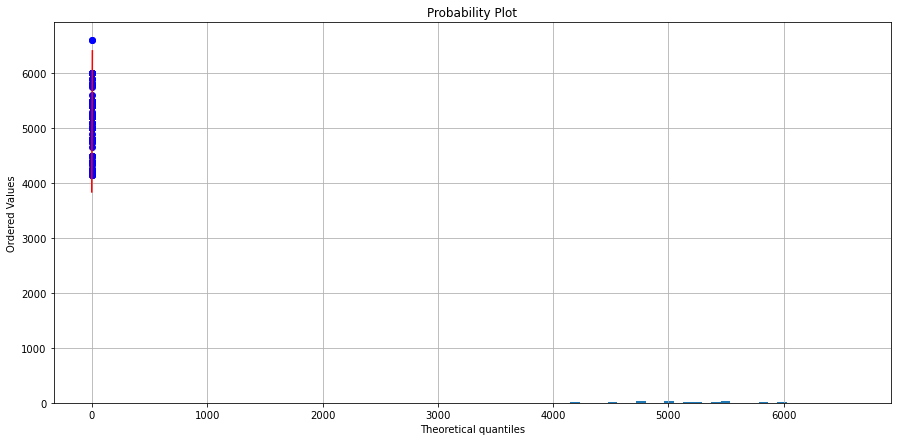

citympg


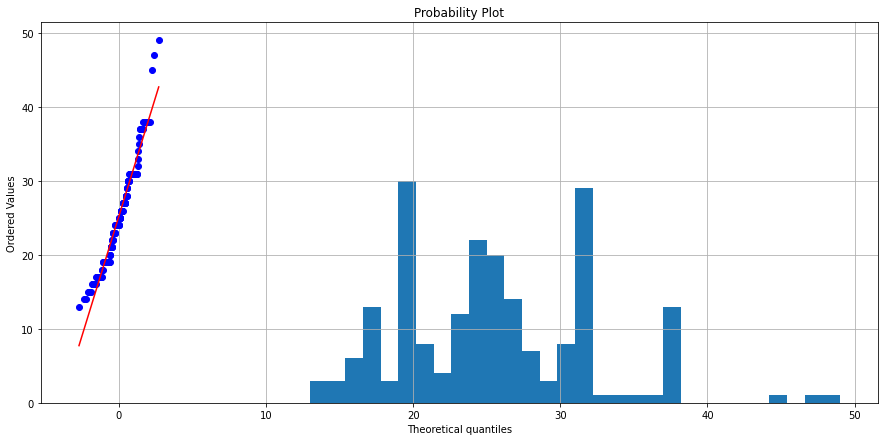

highwaympg


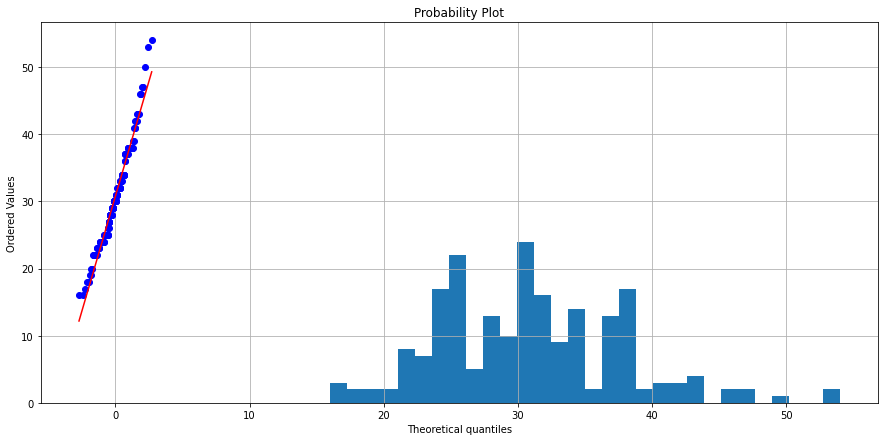

price


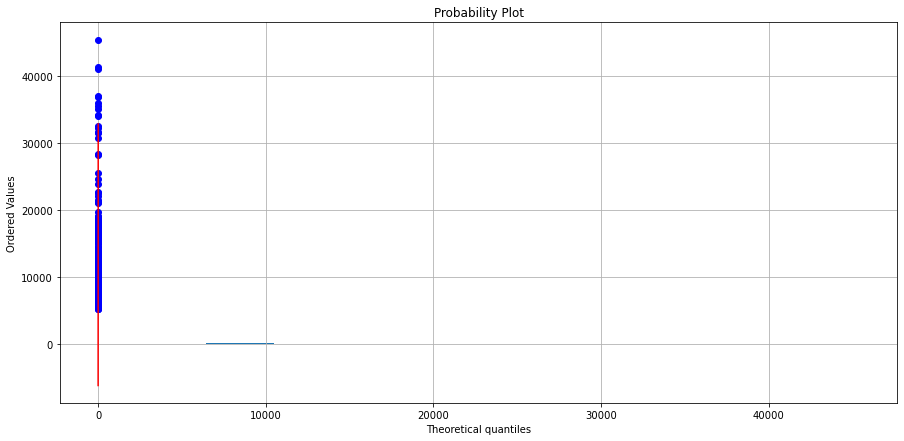

In [25]:
for i in df_numerical.columns:
    fun(df_numerical,i)

car_ID


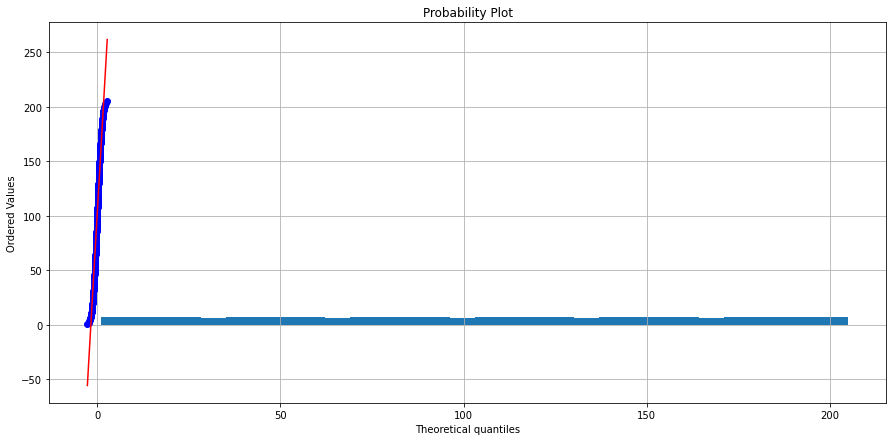

symboling


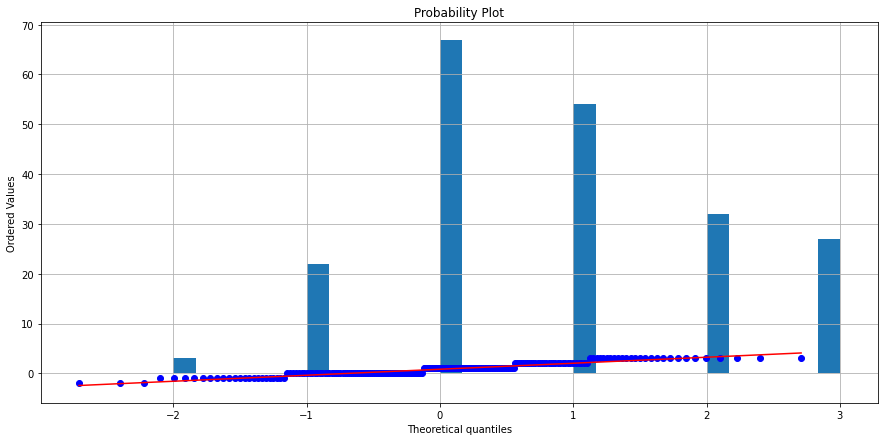

wheelbase


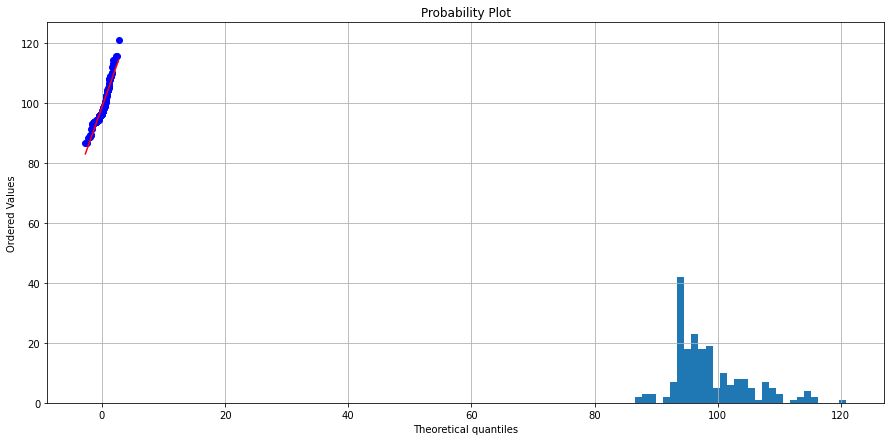

carlength


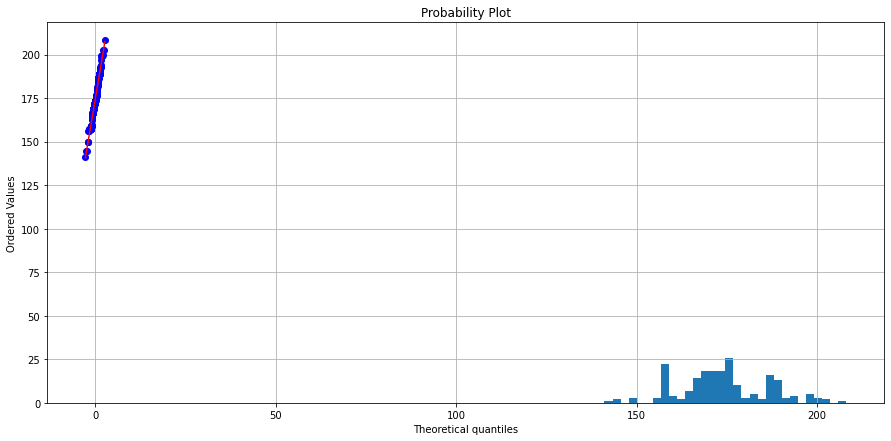

carwidth


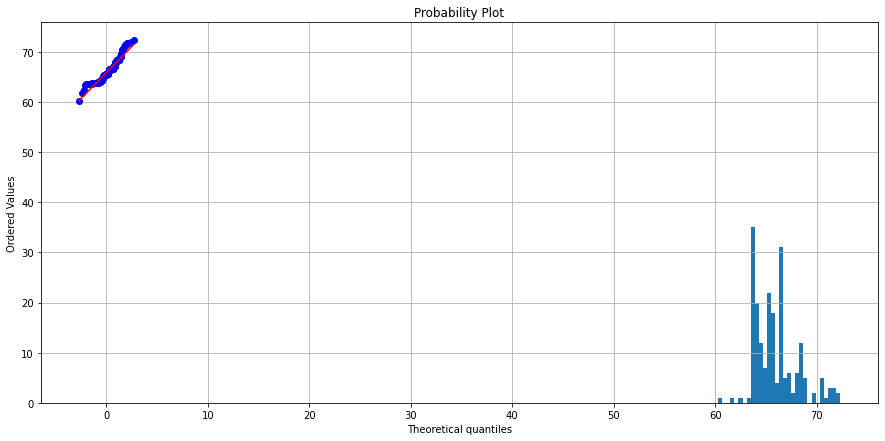

carheight


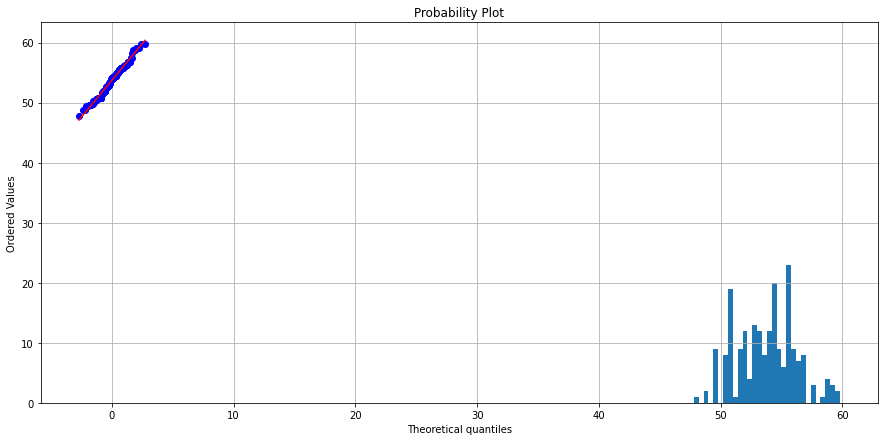

curbweight


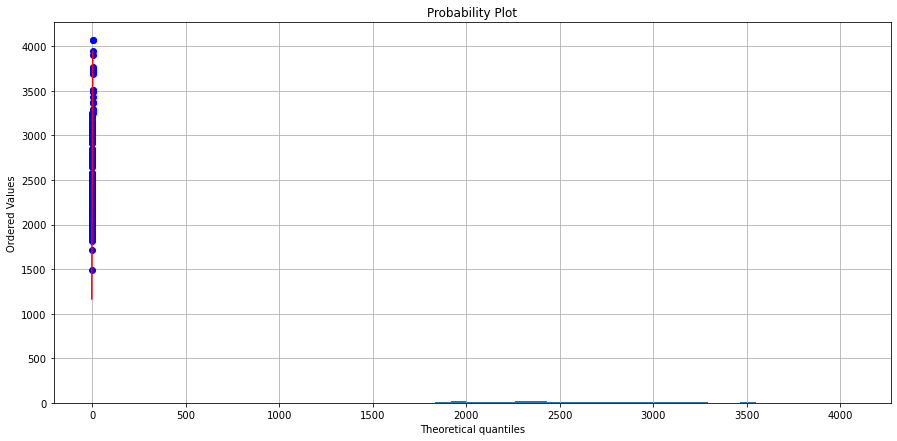

enginesize


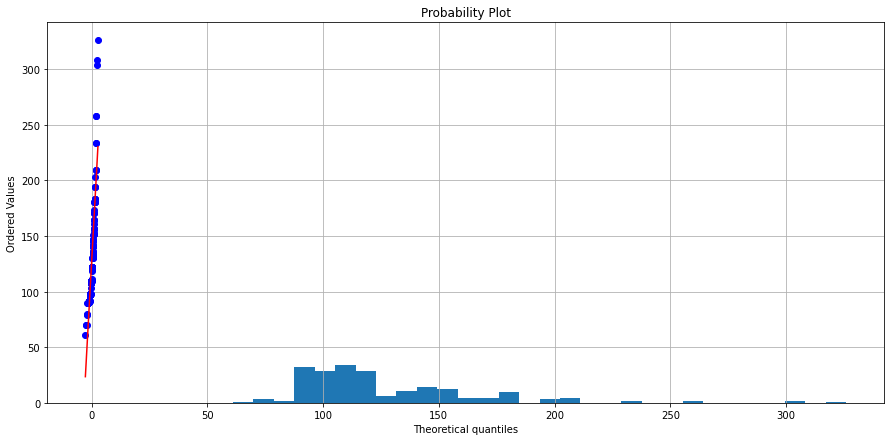

boreratio


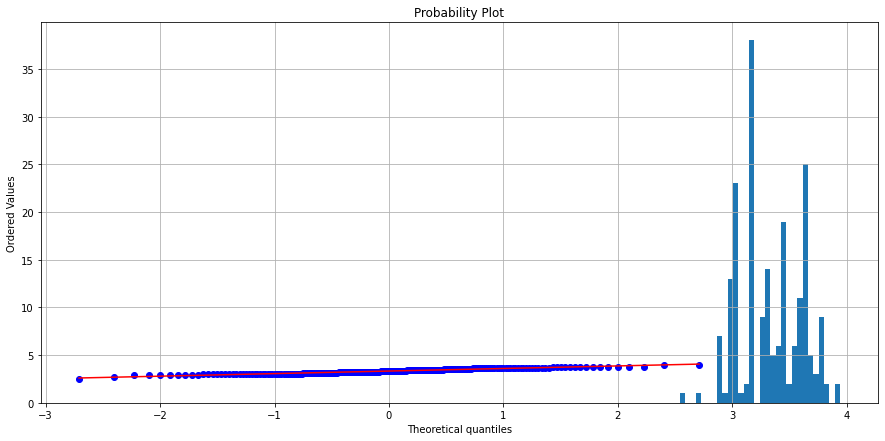

stroke


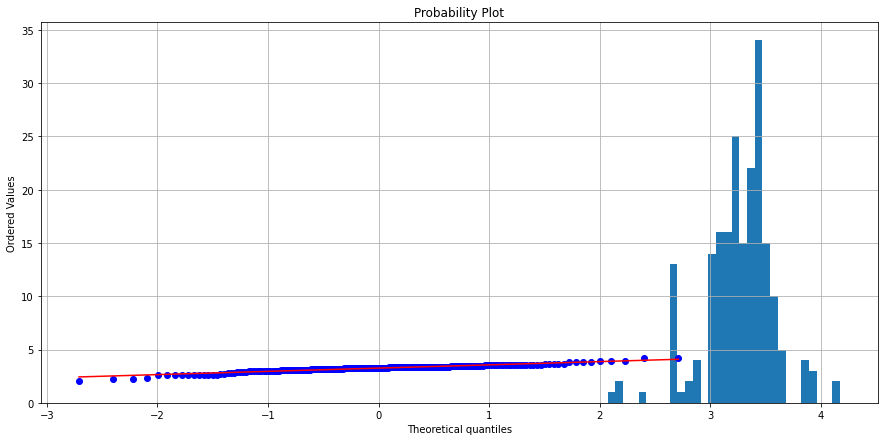

compressionratio


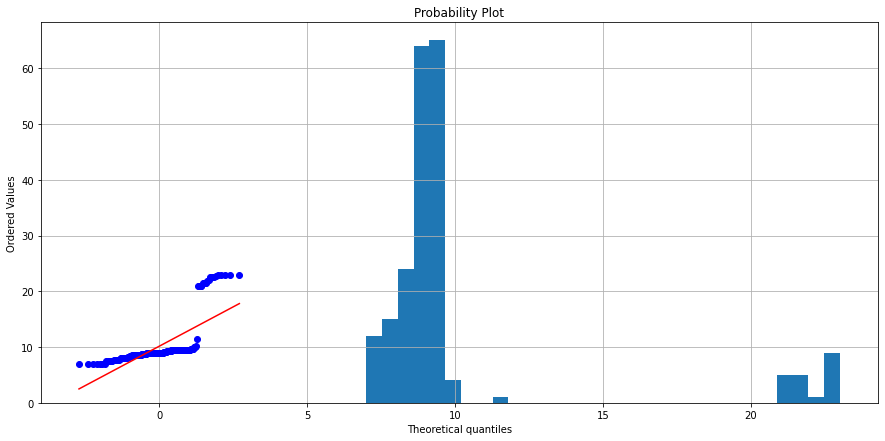

horsepower


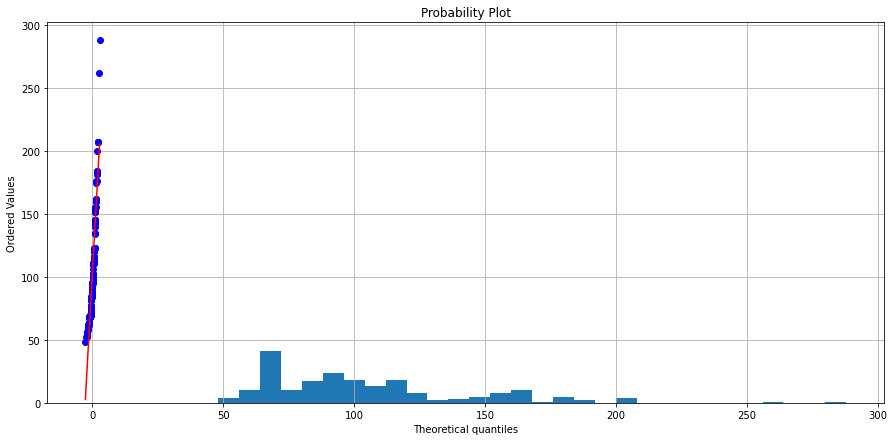

peakrpm


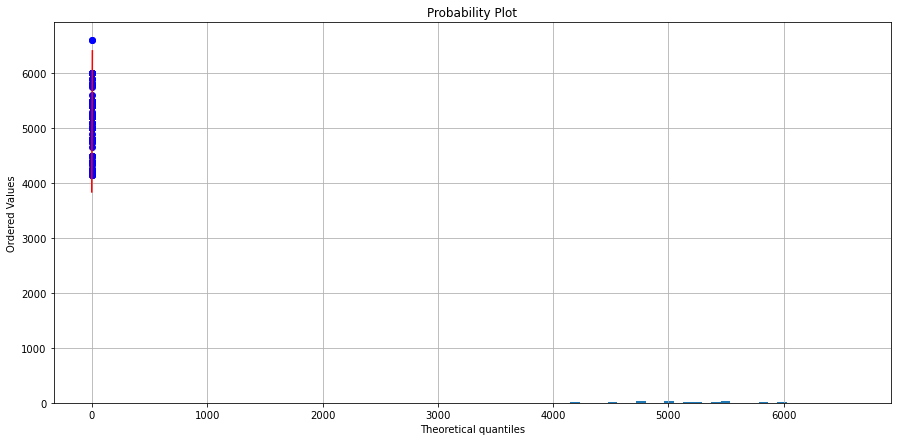

citympg


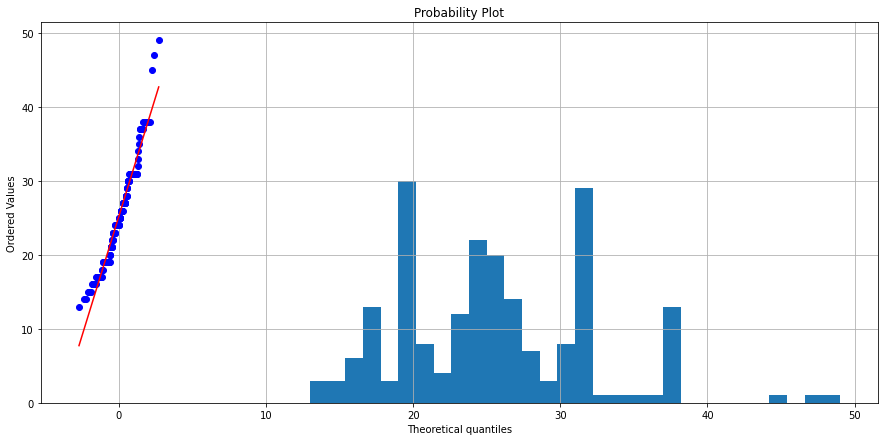

highwaympg


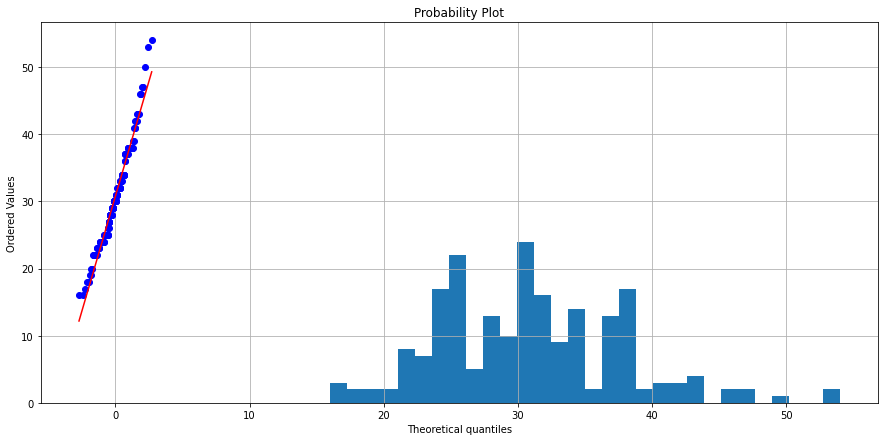

price


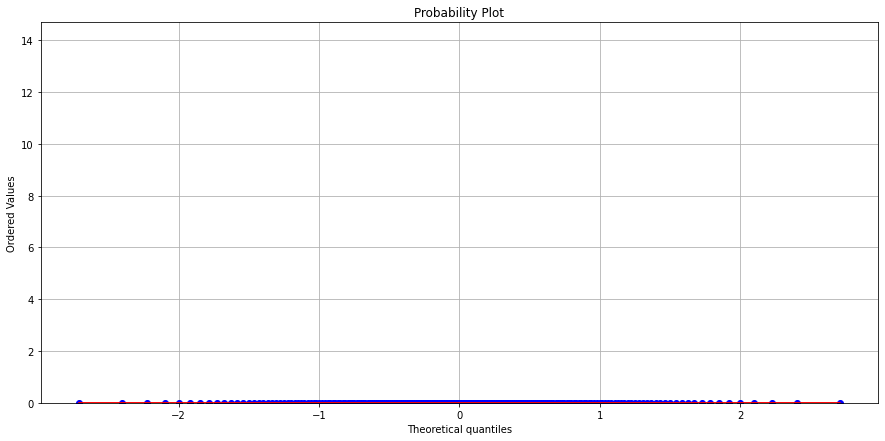

In [26]:
for i in data_1.columns:
    fun(data_1,i)

# Feature Scalling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
for i in data_1.columns:
    data_1[i] = data_1[i].values.reshape(-1,1)

In [30]:
df_numerical_scaled = sc.fit_transform(data_1)

In [31]:
sc.mean_

array([1.03000000e+02, 8.34146341e-01, 9.87565854e+01, 1.74049268e+02,
       6.59078049e+01, 5.37248780e+01, 2.55556585e+03, 1.26907317e+02,
       3.32975610e+00, 3.25541463e+00, 1.01425366e+01, 1.04117073e+02,
       5.12512195e+03, 2.52195122e+01, 3.07512195e+01, 9.68260710e-05])

In [32]:
sc.scale_

array([5.91776985e+01, 1.24226578e+00, 6.00707047e+00, 1.23071608e+01,
       2.13996525e+00, 2.43755487e+00, 5.19408699e+02, 4.15410017e+01,
       2.70182303e-01, 3.12831208e-01, 3.96234058e+00, 3.94475997e+01,
       4.75820841e+02, 6.52616570e+00, 6.86962639e+00, 4.20040050e-05])

In [33]:
numerical_scaled = pd.DataFrame(df_numerical_scaled,columns=data_1.columns)

In [34]:
numerical_scaled.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.541009
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.862299
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.862299
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.598550
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.940850


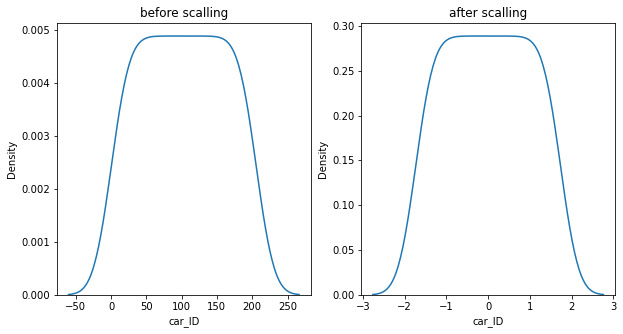

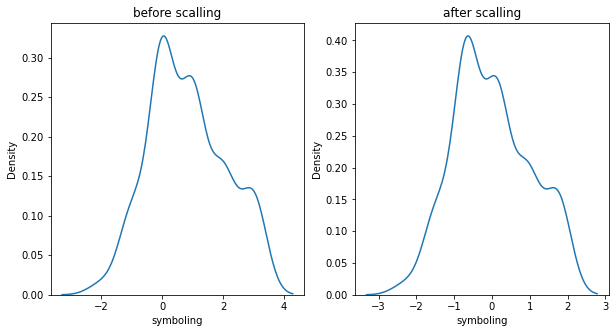

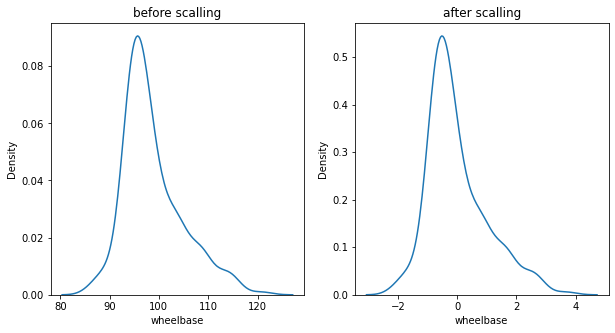

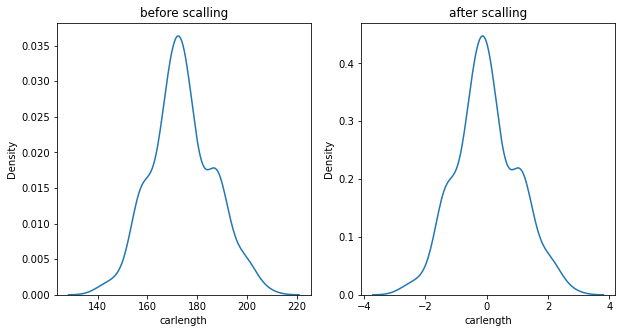

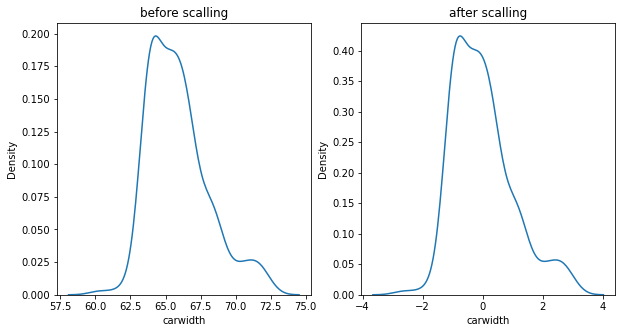

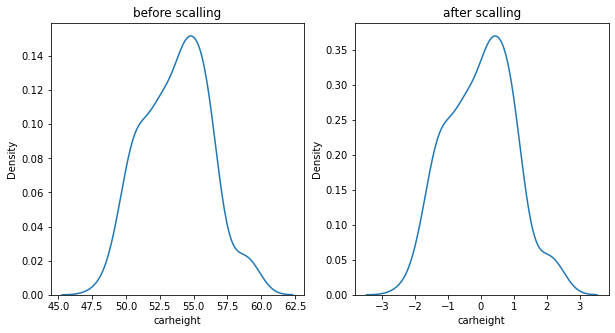

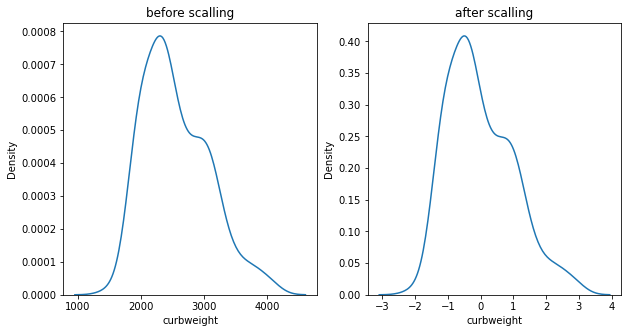

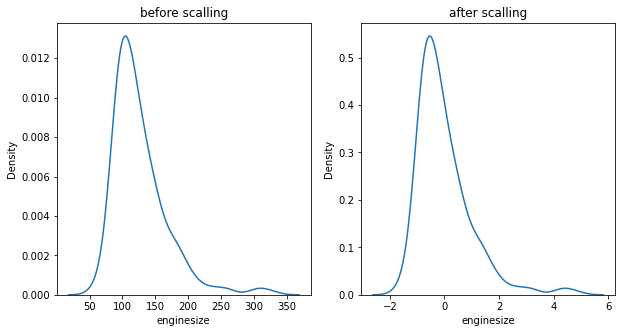

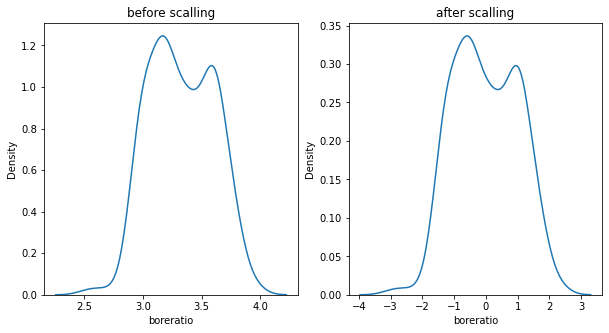

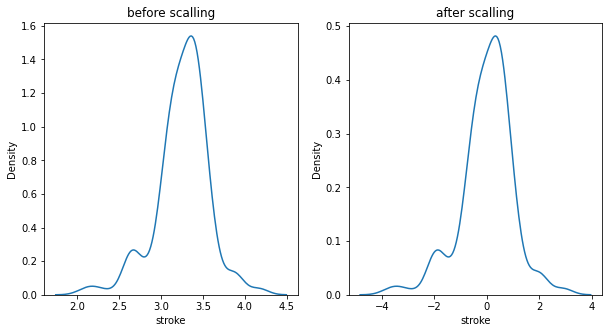

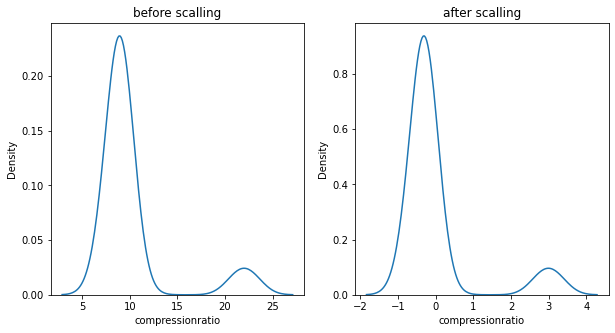

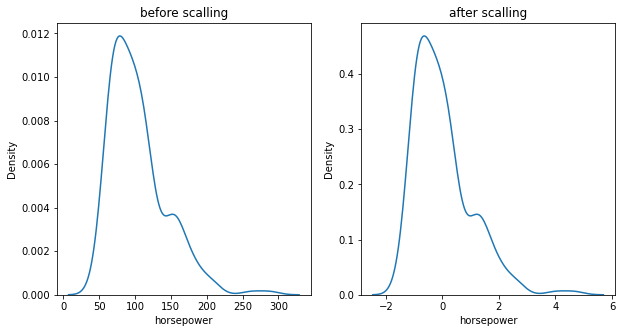

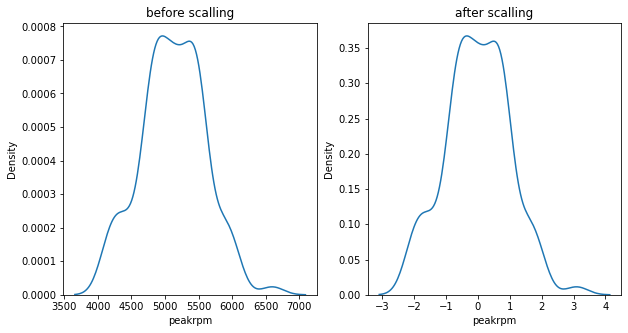

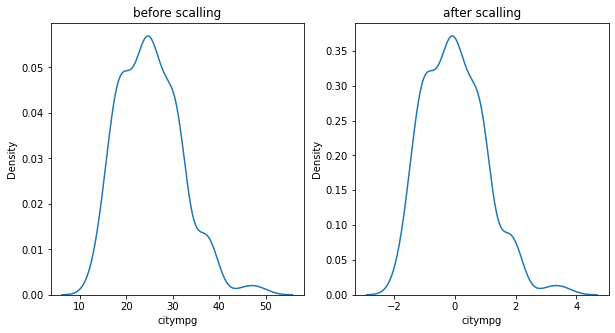

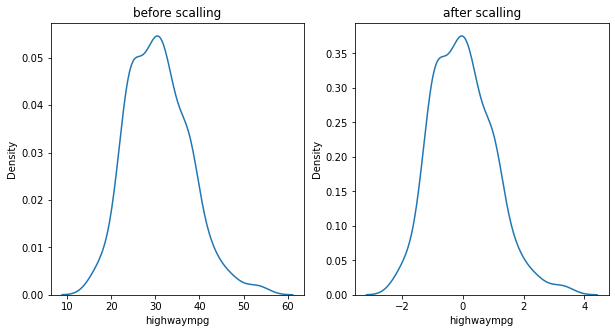

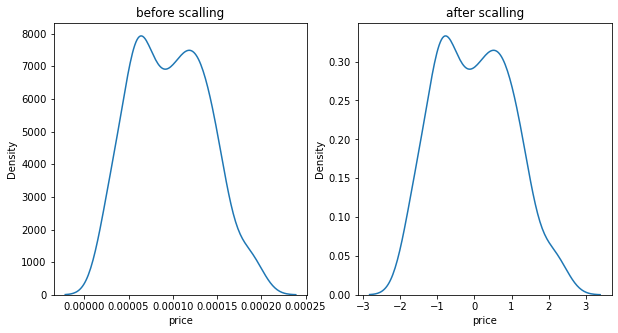

In [35]:
for i in numerical_scaled.columns:
    fig = plt.figure(figsize=(10,5))
    ax1 =fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    plt.title(i)
    ax1.set_title('before scalling')
    sns.kdeplot(data_1[i],ax=ax1)
    
    
    ax2.set_title('after scalling')
    sns.kdeplot(numerical_scaled[i],ax=ax2)
    
plt.show()

In [36]:
data_1['symboling'].std()

1.24530682810553

In [37]:
numerical_scaled['symboling'].std()

1.0024479840791312

# Outliers

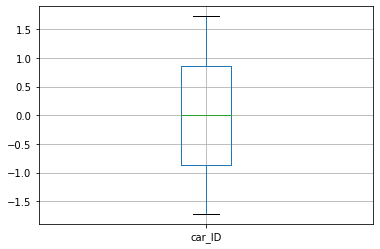

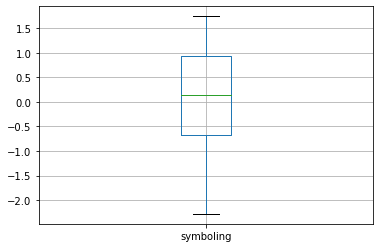

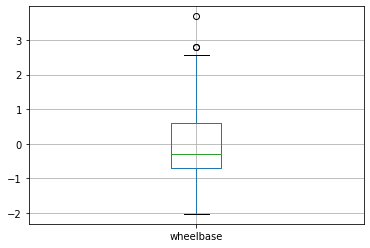

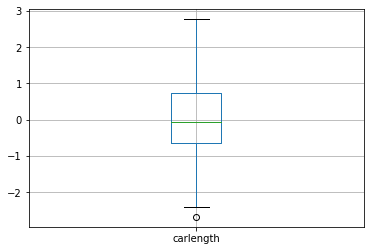

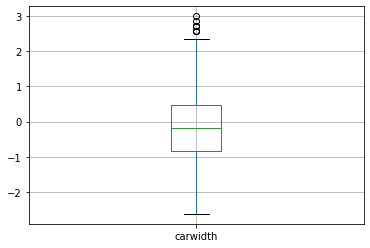

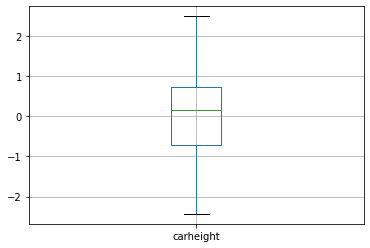

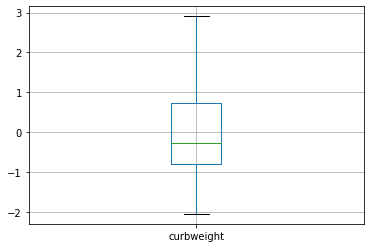

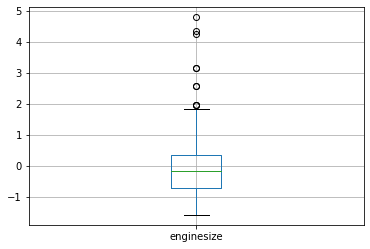

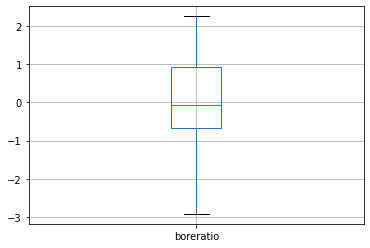

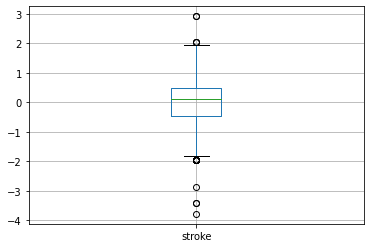

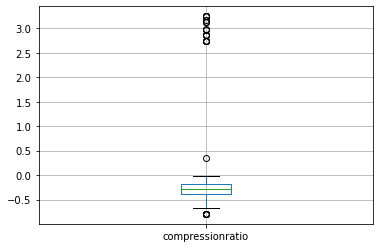

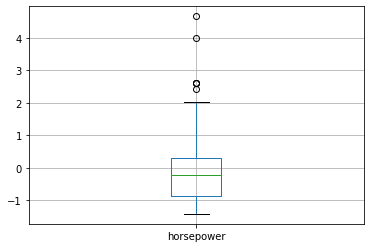

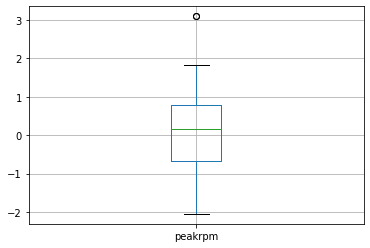

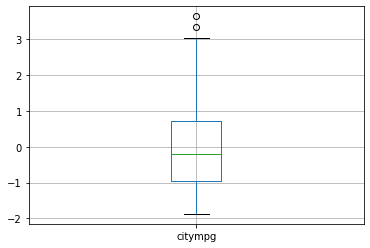

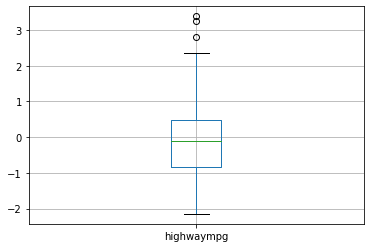

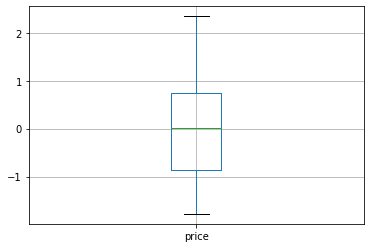

In [38]:
for i in numerical_scaled.columns:
    numerical_scaled[[i]].boxplot()
    plt.show()

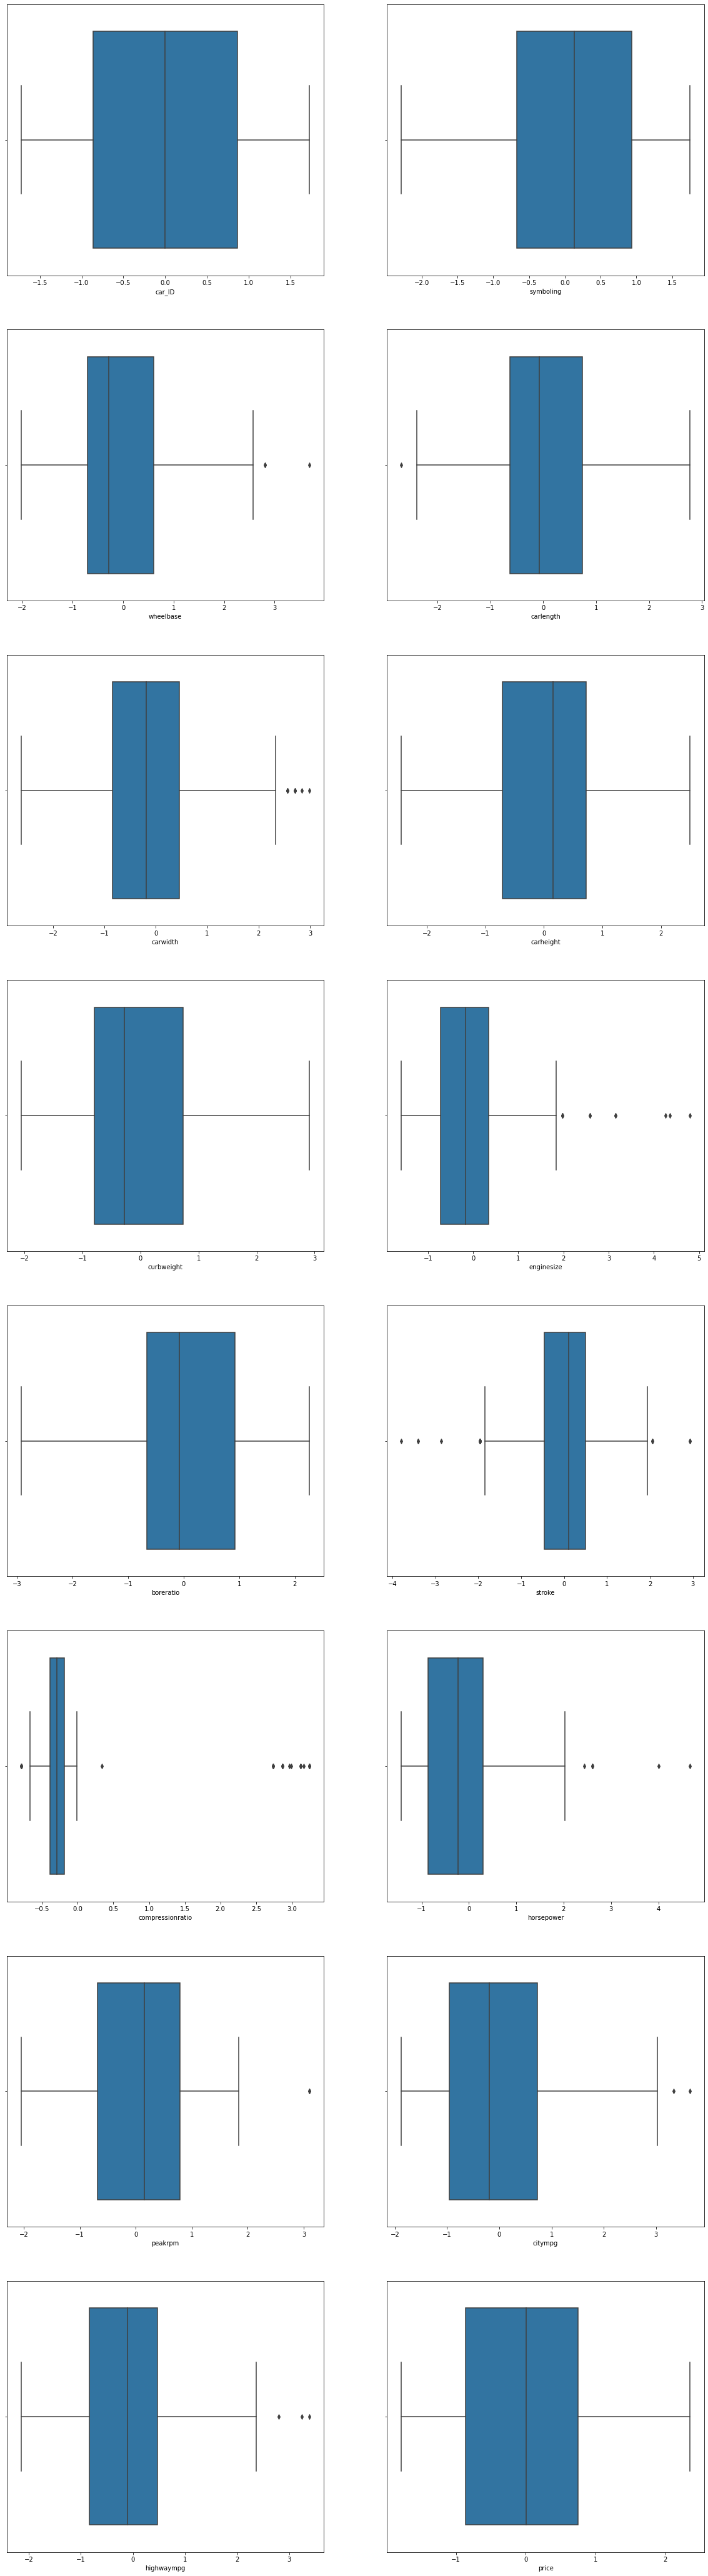

In [39]:
checking = numerical_scaled.columns

fig , ax = plt.subplots(8,2, figsize = (20,75))
for i , subplot in zip(checking,ax.flatten()):
    sns.boxplot(numerical_scaled[i],ax = subplot)
    

In [40]:
numerical_scaled.shape

(205, 16)

In [41]:
numerical_scaled = numerical_scaled.iloc[:,1:]

In [42]:
numerical_scaled.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.541009
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.862299
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.862299
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.598550
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.940850


In [43]:
numerical_scaled.shape

(205, 15)

In [44]:
def outliers(numerical_scaled,var):
    upper = numerical_scaled[var].quantile(0.95)
    lower = numerical_scaled[var].quantile(0.05)
    
    numerical_scaled[var] = np.where(numerical_scaled[var] > upper , upper , 
                         np.where(numerical_scaled[var] < lower , lower , numerical_scaled[var]))

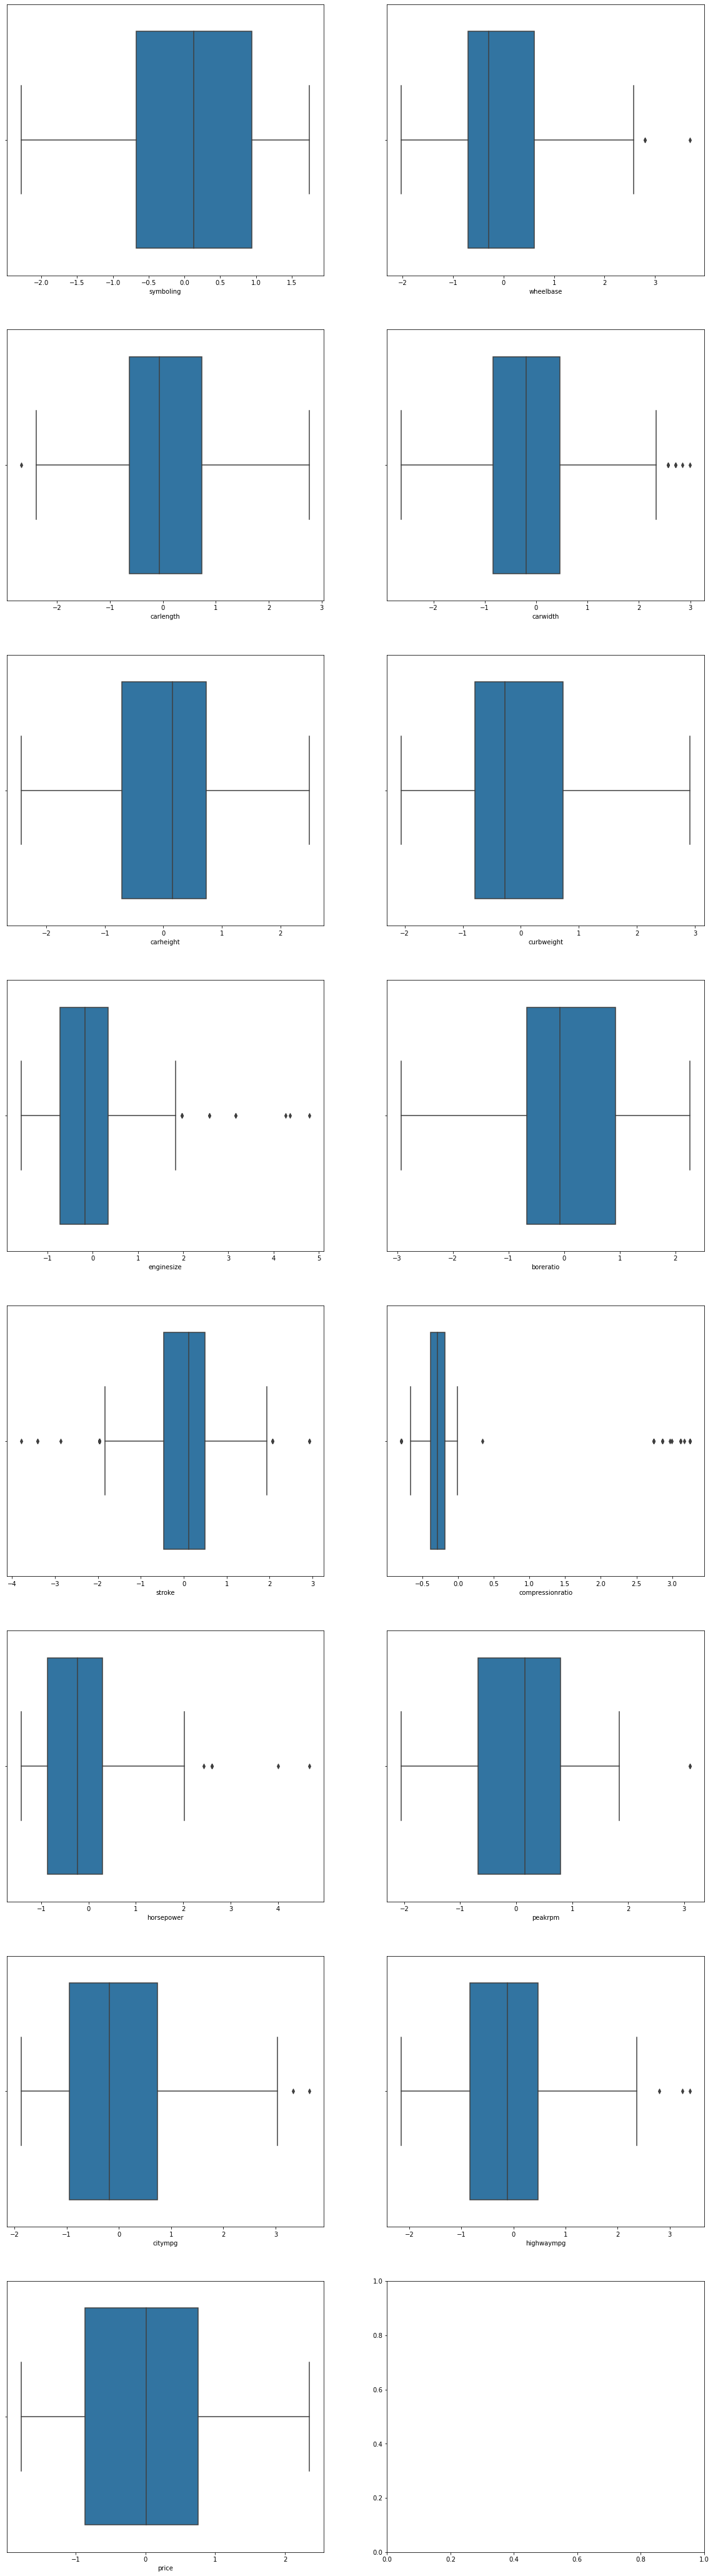

In [45]:
checking = numerical_scaled.columns

fig , ax = plt.subplots(8,2, figsize = (20,75))
for i , subplot in zip(checking,ax.flatten()):
    sns.boxplot(numerical_scaled[i],ax = subplot)

## Constant

In [46]:
from sklearn.feature_selection import VarianceThreshold

In [47]:
reg = VarianceThreshold(threshold=0.0)

In [48]:
reg.fit(numerical_scaled)

VarianceThreshold()

In [49]:
sum(reg.get_support())

15

## Quasi constant

In [50]:
from sklearn.feature_selection import VarianceThreshold

In [51]:
reg = VarianceThreshold(threshold=0.1)

In [52]:
reg.fit(numerical_scaled)

VarianceThreshold(threshold=0.1)

In [53]:
sum(reg.get_support())

15

## Duplicate

In [54]:
numerical_scaled_t = numerical_scaled.T

In [55]:
numerical_scaled_t.duplicated().sum()

0

In [56]:
dupli = numerical_scaled_t.duplicated()

In [57]:
f = [not i for i in dupli]

In [58]:
numerical = numerical_scaled_t[f].T

In [59]:
numerical.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.541009
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.862299
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.862299
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.598550
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.940850


In [60]:
numerical.shape

(205, 15)

## Correlation with Feature Engine

In [61]:
from feature_engine.selection import DropCorrelatedFeatures

In [62]:
reg = DropCorrelatedFeatures(threshold=0.8 , method= 'pearson', missing_values='ignore')

In [63]:
reg.fit(numerical)

DropCorrelatedFeatures()

In [64]:
reg.features_to_drop_

{'carlength', 'curbweight', 'highwaympg', 'horsepower'}

In [65]:
reg.correlated_feature_sets_

[{'carlength', 'wheelbase'},
 {'carwidth', 'curbweight'},
 {'enginesize', 'horsepower'},
 {'citympg', 'highwaympg'}]

In [66]:
numerical = reg.transform(numerical)

In [67]:
numerical.shape

(205, 11)

## Handling categorical values

In [68]:
df_categorical.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [69]:
for feature in df_categorical.columns:
    print('the feature  are-',feature,'and number of categorical are ',len(df_categorical[feature].unique()))

the feature  are- CarName and number of categorical are  147
the feature  are- fueltype and number of categorical are  2
the feature  are- aspiration and number of categorical are  2
the feature  are- doornumber and number of categorical are  2
the feature  are- carbody and number of categorical are  5
the feature  are- drivewheel and number of categorical are  3
the feature  are- enginelocation and number of categorical are  2
the feature  are- enginetype and number of categorical are  7
the feature  are- cylindernumber and number of categorical are  7
the feature  are- fuelsystem and number of categorical are  8


## Label Encoder

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()

In [72]:
for i in df_categorical.columns:
    df_categorical[i] = le.fit_transform(df_categorical[i])

In [73]:
df_categorical

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5
201,138,1,1,0,3,2,0,3,2,5
202,140,1,0,0,3,2,0,5,3,5
203,142,0,1,0,3,2,0,3,3,3


## Chi Square Test

In [74]:
from sklearn.feature_selection import chi2

In [75]:
df['price'].isnull().sum()

0

In [76]:
y = y.astype('int')

In [77]:
chi = chi2(df_categorical,y)

In [78]:
chi

(array([4263.00375916,   18.89189189,  165.22972973,  110.44444444,
          56.05223881,   46.80514706,  202.        ,   70.30906149,
          60.78686636,  250.12143928]),
 array([0.        , 1.        , 0.88309602, 0.99999871, 1.        ,
        1.        , 0.22995516, 1.        , 1.        , 0.00164197]))

In [79]:
p_values = pd.Series(chi[1],index = df_categorical.columns)

In [80]:
p_values.sort_values(ascending = True,inplace = True)

<AxesSubplot:>

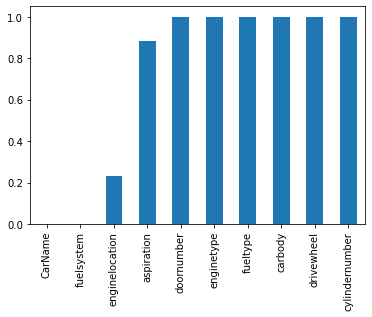

In [81]:
p_values.plot.bar()

In [82]:
p_values

CarName           0.000000
fuelsystem        0.001642
enginelocation    0.229955
aspiration        0.883096
doornumber        0.999999
enginetype        1.000000
fueltype          1.000000
carbody           1.000000
drivewheel        1.000000
cylindernumber    1.000000
dtype: float64

In [83]:
p_values.index[0.000000]

'CarName'

In [84]:
c = []
for i , j in enumerate(p_values):
    if j < 0.05:
        c.append(p_values.index[i])

In [85]:
c

['CarName', 'fuelsystem']

In [86]:
categorical = df_categorical[['CarName', 'fuelsystem']]

In [87]:
categorical[:5]

,CarName,fuelsystem
0,2,5
1,3,5
2,1,5
3,4,5
4,5,5


In [88]:
data = pd.concat([numerical,categorical,y], axis = 1)

In [89]:
data

,symboling,wheelbase,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,CarName,fuelsystem,price
0,1.743470,-1.690772,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,-0.541009,2,5,13495
1,1.743470,-1.690772,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,-0.862299,3,5,16500
2,0.133509,-0.708596,-0.190566,-0.543527,0.604046,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,-0.862299,1,5,16500
3,0.938490,0.173698,0.136542,0.235942,-0.431076,-0.517266,0.462183,-0.035973,0.787855,-0.186865,-0.598550,4,5,13950
4,0.938490,0.107110,0.230001,0.235942,0.218885,-0.517266,0.462183,-0.540725,0.787855,-1.106241,-0.940850,5,5,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.398245,0.728239,0.339248,1.666445,-0.336970,-0.162161,0.577692,-0.340094,-0.891850,139,5,16845
201,-1.476452,1.721873,1.351515,0.728239,0.339248,1.666445,-0.336970,-0.364062,0.367529,-0.953012,-1.055110,138,5,19045
202,-1.476452,1.721873,1.398245,0.728239,1.109571,0.926204,-1.232021,-0.338824,0.787855,-1.106241,-1.197076,140,5,21485
203,-1.476452,1.721873,1.398245,0.728239,0.435538,-1.183483,0.462183,3.244916,-0.683286,0.119594,-1.245650,142,3,22470


## Train Test

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
X.shape

(205, 13)

In [94]:
y.shape

(205,)

In [95]:
len(X_train) , len(y_train)

(137, 137)

In [96]:
len(X_test) , len(y_test)

(68, 68)

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
regression = LinearRegression()

In [99]:
regression.fit(X_train,y_train)

LinearRegression()

## Accuracy For Training Data

In [100]:
y_train_pred = regression.predict(X_train)

In [101]:
from sklearn.metrics import r2_score , mean_squared_error

In [102]:
r2_score(y_train,y_train_pred)*100

90.81434350487089

In [103]:
mean_squared_error(y_train,y_train_pred)

5736909.186986913

## Accuracy For Test  Data

In [104]:
y_test_p = regression.predict(X_test)

In [105]:
r2_score(y_test,y_test_p)*100

87.44900498890175

In [106]:
import pickle

In [107]:
with open("car prediction.pkl", "wb") as f:
    pickle.dump(regression,f)
    

In [108]:
classification_1 = pickle.load(open("car prediction.pkl", "rb"))

In [109]:
classification_1.predict([[1,1,1,1,1,1,1,1,1,1,0,0,0]])

array([22709.62165631])